In [518]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  

In [519]:
data = pd.read_csv("Lionel Messi Goals.csv")
data.head(5)

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,samedi 16 f�vrier 2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,dimanche 13 janvier 2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,samedi 22 d�cembre 2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,samedi 20 octobre 2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,dimanche 23 septembre 2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


# A. preprocess the Date column and convert it to year 

In [520]:
data['Date'] = data['Date'].to_numpy(str)

date_list = []
for date in data['Date'] :
    date_list.append( date[-4:])
    
data['Date'] = date_list

data.head(5)

,Date,Competition Name,Home team,Opponent,Away team,Minute,Score Home Team - When Messi Scored,Score Away Team - When Messi Scored,Goal Type,Goal Method,Final Game Result
0,2019,Liga,FC Barcelona,Real Valladolid,Real Valladolid,43,1,0,Penalty,Left foot,Won
1,2019,Liga,FC Barcelona,Eibar,Eibar,53,2,0,Field goal,Left foot,Won
2,2018,Liga,FC Barcelona,Celta de Vigo,Celta de Vigo,45,2,0,Field goal,Left foot,Won
3,2018,Liga,FC Barcelona,Sevilla,Sevilla,12,2,0,Field goal,Left foot,Won
4,2018,Liga,FC Barcelona,Girona,Girona,19,1,0,Field goal,Left foot,Draw


# A. Number of messi's goal in each year

In [521]:
df = data.value_counts(['Date']).reset_index()
df = df.sort_values(by= 'Date' , ascending=True).reset_index()
df.rename(columns = { 0 :'count'}, inplace = True)
df

,index,Date,count
0,14,2005,3
1,13,2006,12
2,10,2007,31
3,11,2008,22
4,9,2009,41
5,1,2010,60
6,2,2011,59
7,0,2012,91
8,8,2013,45
9,4,2014,58


Text(0, 0.5, 'Number of goals')

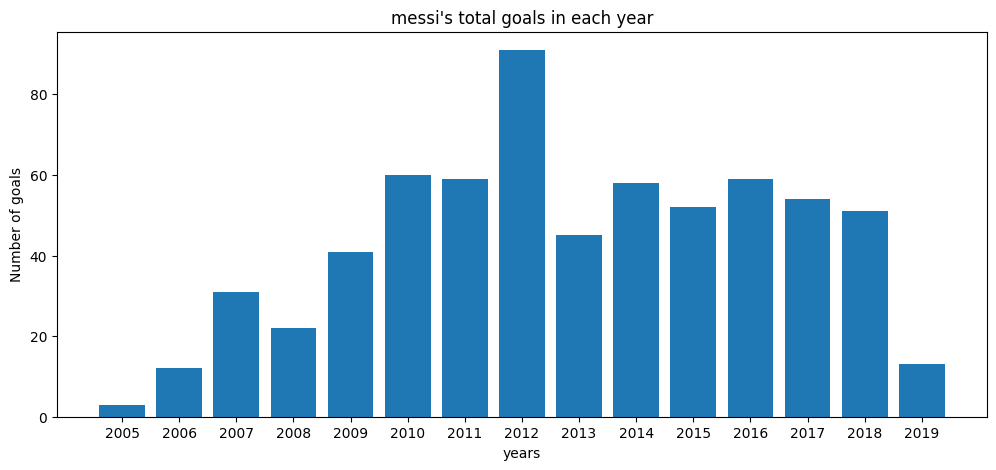

In [522]:
plt.figure(figsize=(12, 5))
plt.bar(df['Date'] , df['count'])
plt.title("messi's total goals in each year")
plt.xlabel("years")
plt.ylabel("Number of goals")

### B. مسی اکثر پنالتی ها را با پای چپ زده است یا با پای راست؟ بر روی نمودار نمایش دهید

In [523]:


data.rename(columns = {'Goal Type':'GoalType'}, inplace = True)
df=data.query(' GoalType == "Penalty" ')['Goal Method'].value_counts().reset_index()
df.rename(columns = { 'Goal Method' :'count'}, inplace = True)
df.rename(columns = { 'index' :'Goal Method'}, inplace = True)
df.loc[1]=['Right foot',0]

df


,Goal Method,count
0,Left foot,82
1,Right foot,0


Text(0.5, 1.0, 'penalties goal methods')

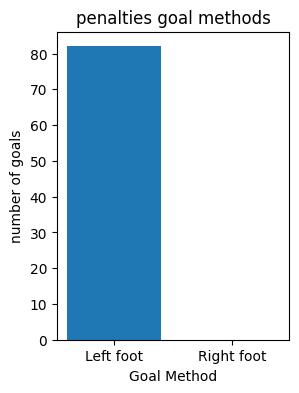

In [524]:
plt.figure(figsize=(3,4))
plt.bar(df['Goal Method'] , df['count'])
plt.xlabel('Goal Method')
plt.ylabel('number of goals')
plt.title('penalties goal methods')

### C. چند درصد بازی هایی که در آن ها مسی در وقت اضافه گل زده است، به پیروزی ختم شده اند؟ 


In [526]:
data.rename(columns = {'Final Game Result':'Final_Game_Result'}, inplace = True)

data["Minute"]=data["Minute"].apply(eval)
data["Minute"]=data["Minute"].astype(int)
df = data.query(' Minute > 89 ')['Final_Game_Result'].value_counts().reset_index()
df

,index,Final_Game_Result
0,Won,35
1,Draw,3
2,Lost,2


In [527]:
df.rename(columns = {'index':'states'}, inplace = True)

df

,states,Final_Game_Result
0,Won,35
1,Draw,3
2,Lost,2


Text(0.5, 1.0, 'percentage of wons which messi goal in extra time')

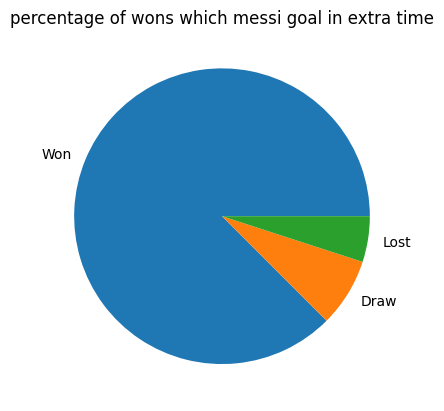

In [528]:
plt.pie(df['Final_Game_Result'] , labels= df['states'])

plt.title("percentage of wons which messi goal in extra time")

# class codes - session 40

In [530]:
method = data['Goal Method'].value_counts().reset_index()
method

,index,Goal Method
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


In [531]:
# bishtare gol ha chejoori boodan ?

df = data["GoalType"].value_counts().reset_index()
df

,index,GoalType
0,Field goal,155
1,Penalty,82
2,Free kick,44
3,Rebound,37
4,Solo run,22


In [532]:
# 5 no goal type darim 

In [ ]:
plt.pie(df["Goal Type"] , labels= df["index"])
plt.title("messi's Goals")
plt.show()

In [ ]:
df = data["Goal Method"].value_counts().reset_index()
df

,index,Goal Method
0,Left foot,538
1,Right foot,86
2,Head,24
3,Hand,1
4,Hip,1
5,Chest,1


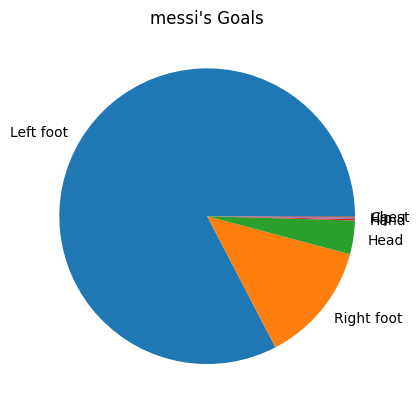

In [ ]:

plt.pie(df["Goal Method"] , labels= df["index"])

plt.title("messi's Goals")
plt.show()

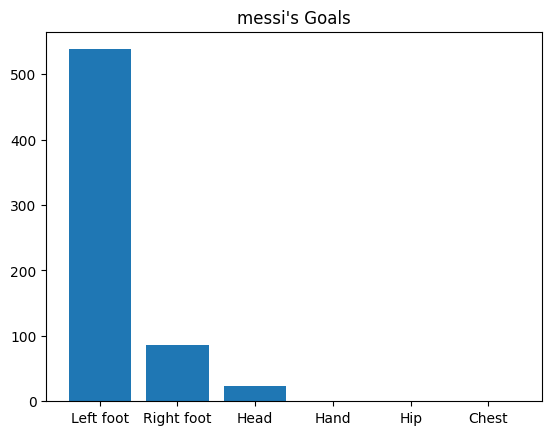

In [ ]:
plt.bar( df["index"] , df["Goal Method"] )

plt.title("messi's Goals")
plt.show()

In [ ]:
# preprocess minute
x =" 2 + 5 - 3"
w= eval(x)
print(w)


4


In [ ]:
# dataframe convert str to int --- eval ---> baraye tabdile 90+2 be  92 


data["Minute"] = data["Minute"].apply(eval)

data["Minute"] = data["Minute"].astype(int)

In [ ]:
# minutes of goal 

df = data["Minute"].value_counts().reset_index().sort_values(by = ["Minute"] , ascending=True)

df
# sort karde bar asase tedade goal

,index,Minute
93,97,1
92,110,1
91,34,1
88,69,2
90,46,2
...,...,...
4,80,13
3,55,13
2,92,13
1,87,15


In [ ]:
plt.figure(figsize=(24,8))
plt.plot(df["Minute"] ,  df["index"])
plt.show()